Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

Какой клиент совершил больше всего успешных операций? (success == True)

С какой платформы осуществляется наибольшее количество успешных операций?

Какую платформу предпочитают премиумные клиенты?

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

Постройте график распределения числа успешных операций

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

user_data:

client – идентификатор пользователя
premium – является ли клиент премиум
age – возраст

logs:

client – идентификатор пользователя
success – результат (успех - 1, нет - 0)
platform – платформа
time – время в формате Unix

In [2]:
import pandas as pd

In [4]:
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

(4500, 4)

In [8]:
user_data.shape

(2954, 3)

In [6]:
logs.shape

(4500, 4)

In [11]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [12]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [19]:
#isnull()
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [22]:
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [25]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [26]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [27]:
user_data_logs = user_data.merge(logs, on = 'client', how='inner')

In [28]:
user_data_logs.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


Какой клиент совершил больше всего успешных операций? (success == True)

In [82]:
success_count = user_data_logs.query('success == True') \
    .groupby('client', as_index=False) \
    .aggregate({'platform': 'count'}) \
    .sort_values(by='platform', ascending=False) \
    .rename(columns={'client': 'client_id', 'platform': 'count_success_order'})
success_count_max = success_count.count_success_order.max()

In [67]:
clients_with_max_order_id = success_count.query('count_success_order == @success_count_max').client_id.tolist()

С какой платформы осуществляется наибольшее количество успешных операций?

In [83]:
user_data_logs.query('success == True') \
    .groupby('platform',as_index=False) \
    .aggregate({'client': 'count'}) \
    .rename(columns={'client': 'orders_count'}) \
    .sort_values(by='orders_count', ascending=False)


,platform,orders_count
1,phone,1565
0,computer,843
2,tablet,139


Какую платформу предпочитают премиумные клиенты?

In [104]:
user_data_logs.query("premium == True and success == True").groupby('platform', as_index=False).aggregate({'client': 'count'})

,platform,client
0,computer,108
1,phone,177
2,tablet,18


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [111]:
user_data_logs_premium_data = user_data_logs[['premium', 'age']].groupby('premium',as_index=False).aggregate({'age': 'mean'})
user_data_logs_premium_data

,premium,age
0,False,44.179198
1,True,44.533333


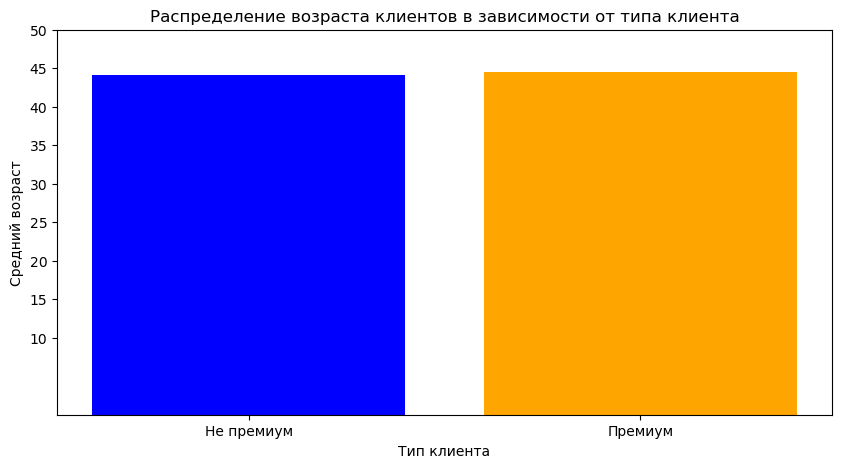

In [122]:
import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(user_data_logs_premium_data['premium'], user_data_logs_premium_data['age'], color=['blue', 'orange'])
plt.xlabel('Тип клиента')
plt.ylabel('Средний возраст')
plt.title('Распределение возраста клиентов в зависимости от типа клиента')
plt.xticks([0, 1], ['Не премиум', 'Премиум'])
plt.yticks([10,15,20,25,30,35,40,45,50])
plt.show()

/var/folders/h1/yb0zs4n55qvbqx80wd3pjxmm0000gn/T/ipykernel_2373/1377759682.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_data_logs.query('premium == False').age, color='green', ax=ax[0], kde=False)
/var/folders/h1/yb0zs4n55qvbqx80wd3pjxmm0000gn/T/ipykernel_2373/1377759682.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

<Axes: xlabel='age'>

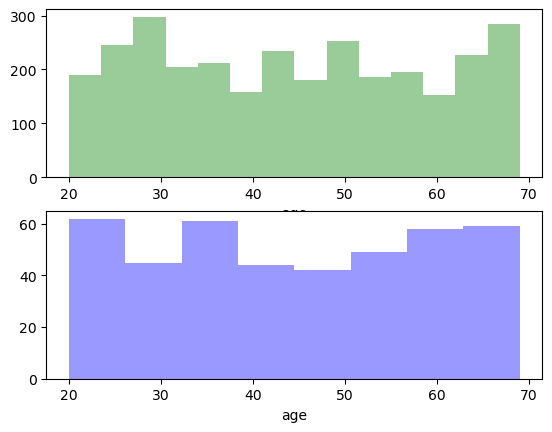

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.distplot(user_data_logs.query('premium == False').age, color='green', ax=ax[0], kde=False)
sns.distplot(user_data_logs.query('premium == True').age, color="blue", ax=ax[1], kde=False)

Постройте график распределения числа успешных операций

In [157]:
success_operation = user_data_logs.groupby('client').aggregate({'success': 'sum'})
success_operation

,success
client,
40,1
75,1
81,1
132,1
164,1
...,...
99926,1
99927,1
99931,1


/var/folders/h1/yb0zs4n55qvbqx80wd3pjxmm0000gn/T/ipykernel_2373/73490467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(success_operation, kde=False)


<Axes: >

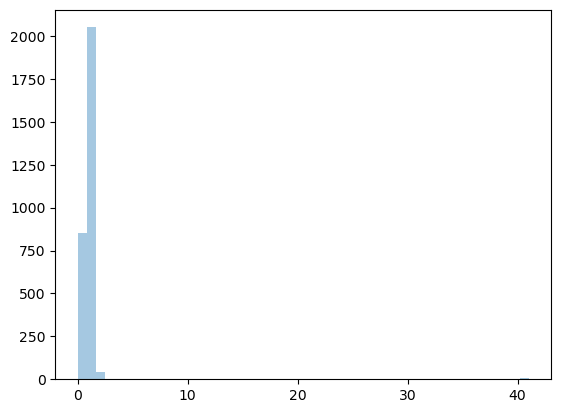

In [158]:
sns.distplot(success_operation, kde=False)


Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?


In [166]:
age_success = user_data_logs \
    .query("platform == 'computer'") \
    .groupby('age', as_index=False) \
    .aggregate({'success': 'sum'})
age_success.head()

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


<Axes: xlabel='age', ylabel='success'>

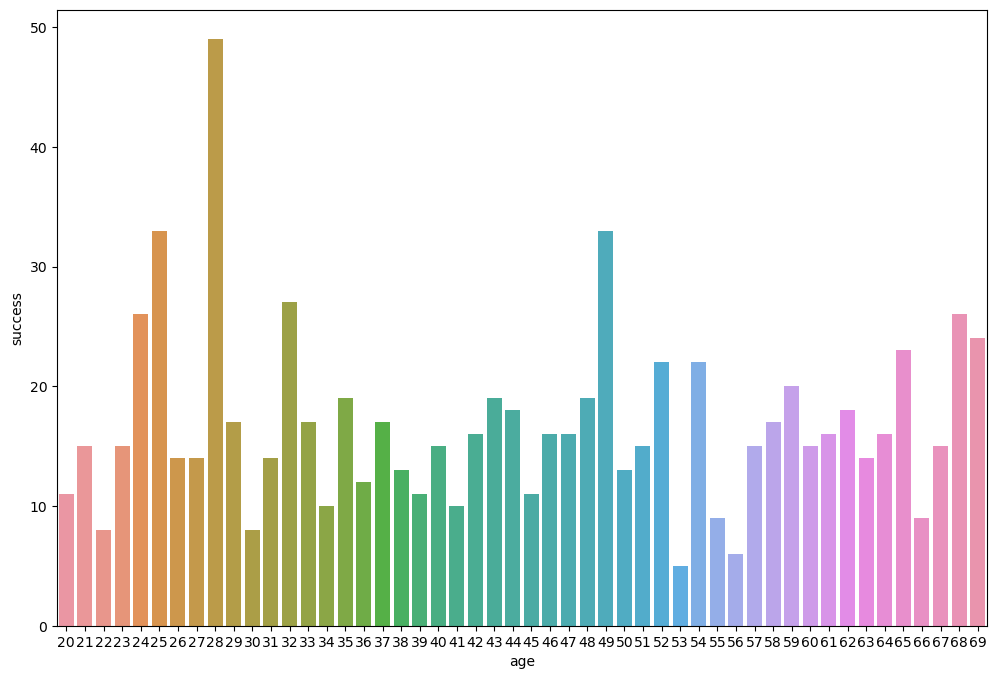

In [170]:
plt.figure(figsize=(12,8))
sns.barplot(x=age_success.age, y=age_success.success)

In [174]:
age_success.sort_values(by='success', ascending=False).head(1)

,age,success
8,28,49
